In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
x = numpy.arange(-5,5,0.1)
y = numpy.arange(-5,5,0.1)


In [3]:
#define the Joukowski transformation

def j_trans(z,c):
    j_trans = z + c**2/z
    return j_trans

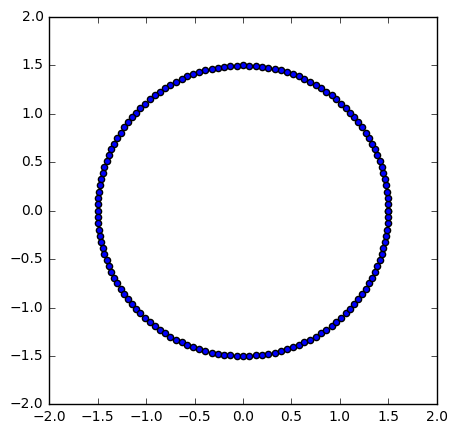

In [4]:
#using the polar coordinate system to draw a circle

theta = numpy.linspace(0,2*math.pi,145)
R = 1.5                                          #radius
c = 1.                                           #some kinds of constant, we use c = 1 here
x_circle = R*numpy.cos(theta)                    
y_circle = R*numpy.sin(theta)

#plot the circle to see if it's right 
pyplot.figure(figsize=(5,5))
pyplot.scatter(x_circle,y_circle)

In [5]:
#transform from z plane to xi plane

z = x_circle + y_circle*1j
z_jtrans = j_trans(z,c)

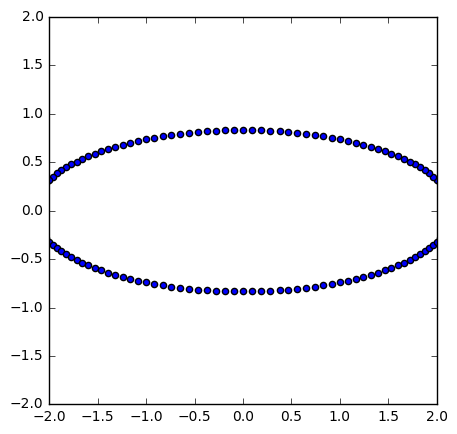

In [6]:
#plot the result of transformation

pyplot.figure(figsize = (5,5))
pyplot.xlim(-2,2)
pyplot.ylim(-2,2)
pyplot.scatter(z_jtrans.real,z_jtrans.imag)

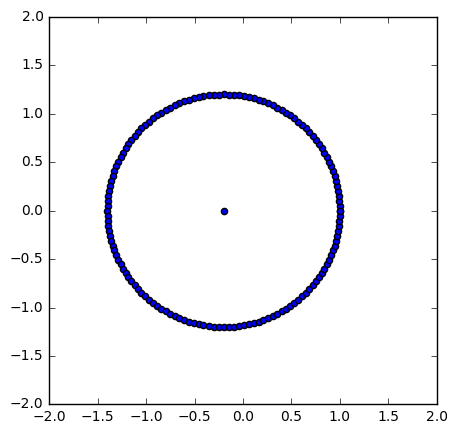

In [7]:
#the second case, with R = 1.2, c = 1, center at (x,y) = (c-R,0)

R_2 = 1.2
c_2 = 1.
x_2 = c_2 - R_2 + R_2*numpy.cos(theta)
y_2 = R_2*numpy.sin(theta)
pyplot.figure(figsize = (5,5))
pyplot.xlim(-2,2)
pyplot.ylim(-2,2)
pyplot.scatter(x_2,y_2)
pyplot.scatter(c_2-R_2,0)

In [8]:
#the second case, transform from z plane to xi plane

z_2 = x_2 +y_2*1j
z_2trans = j_trans(z_2,c_2)

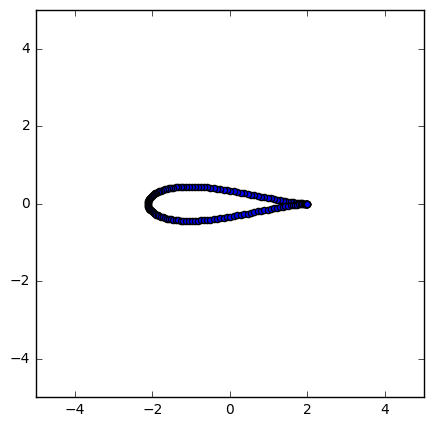

In [9]:
#plot the result

pyplot.figure(figsize = (5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.scatter(z_2trans.real,z_2trans.imag)

---

In [10]:
#the third case 

delta_x = 0.1
delta_y = 0.1
R_3 = ((c-(-delta_x))**2 + delta_y**2)**0.5

In [11]:
#transform to xi plane

x_3 = -delta_x +R_3*numpy.cos(theta)
y_3 = R_3*numpy.sin(theta)+delta_y
z_3 = x_3+y_3*1j
z_3trans = j_trans(z_3,c)

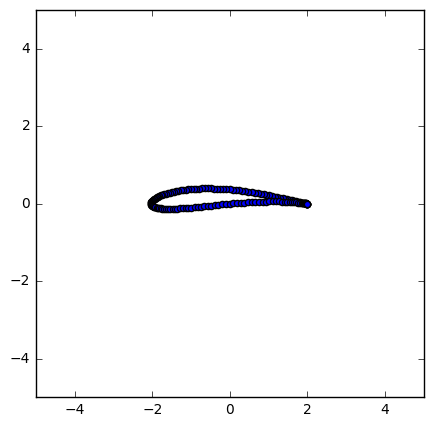

In [12]:
pyplot.figure(figsize = (5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.scatter(z_3trans.real,z_3trans.imag)

---

In [13]:
#the one that is going to use in the following assignment, R = 1.15, centered at (-0.15,0)


x_center, y_center = -0.15, 0
R_4 = 1.15
x_4 = x_center + R_4*numpy.cos(theta)
y_4 = y_center + R_4*numpy.sin(theta)
z_4 = x_4 + y_4*1j
z_4trans = j_trans(z_4,c)

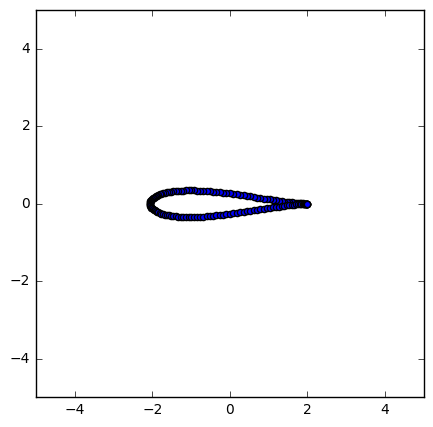

In [14]:
pyplot.figure(figsize = (5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.scatter(z_4trans.real,z_4trans.imag)

In [15]:
#make the meshgrids of polar coordinate

N_r = 100
N_theta = 145
r = numpy.linspace(R_4,5,N_r)
theta_4 = numpy.linspace(0,2*math.pi,N_theta)
R,THETA = numpy.meshgrid(r,theta_4)

In [16]:
#calculate the meshgrid points' location on the z plane

X = x_center + R*numpy.cos(THETA)
Y = y_center + R*numpy.sin(THETA)


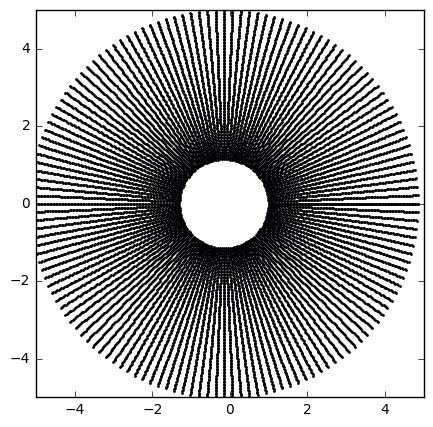

In [17]:
#plot to check the result

pyplot.figure(figsize = (5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.scatter(X,Y,s=1)

In [18]:
#transform the meshgrid points to xi plane

Z = X+1j*Y
Z_trans=j_trans(Z,c)


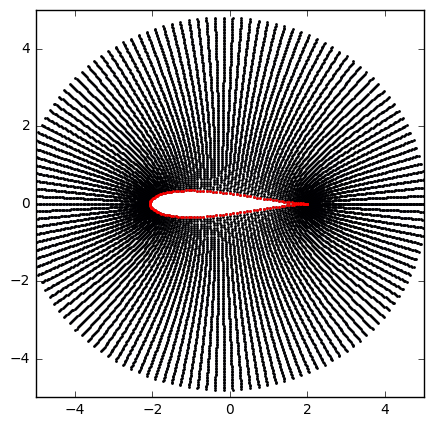

In [19]:
#plot to check the result

pyplot.figure(figsize = (5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.scatter(Z_trans.real,Z_trans.imag,s=1)
pyplot.scatter(z_4trans.real,z_4trans.imag,color = 'r',s=1)

In [20]:
#velocity of the freestream

u_freestream = 1.
v_freestream = 0.
psi_freestream = Y

In [21]:
#doublet and the free stream
kappa = 2*math.pi*R_4**2*u_freestream                         # strength of the doublet
x_doublet, y_doublet = -0.15, 0.0    # location of the doublet

In [22]:
#velocity of the doublet

u_doublet = - kappa/(2*math.pi)*((X-x_center)**2-(Y-y_center)**2)/((X-x_center)**2+(Y-y_center)**2)**2
v_doublet = - kappa/(2*math.pi)*2*(X-x_center)*(Y-y_center)/((X-x_center)**2+(Y-y_center)**2)**2
psi_doublet = -kappa/(2*math.pi)*(Y-y_center)/((X-x_center)**2 +(Y-y_center)**2)

In [23]:
u = u_doublet + u_freestream
v = v_doublet + v_freestream
psi = psi_doublet +psi_freestream

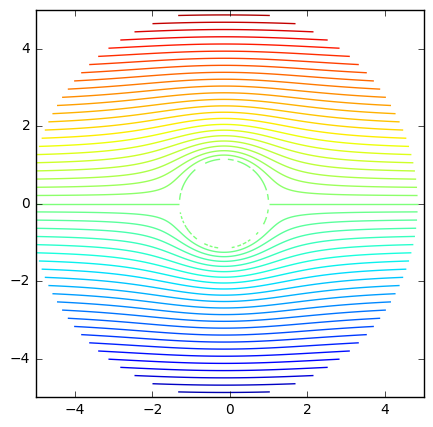

In [24]:
pyplot.figure(figsize=(5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.contour(X,Y,psi,levels = numpy.linspace(-5,5,51))


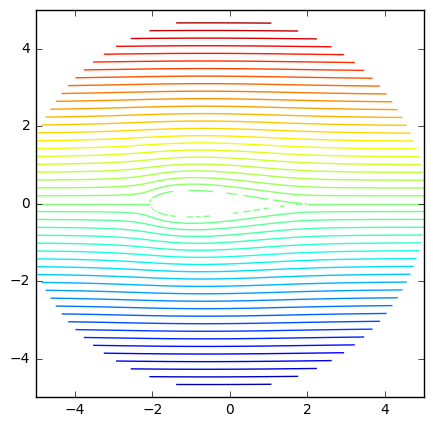

In [25]:
pyplot.figure(figsize=(5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.contour(Z_trans.real,Z_trans.imag,psi,levels = numpy.linspace(-5,5,51),)

In [26]:
numpy.shape(Z_trans.real)

(145, 100)

---

In [27]:
W_xi = (u - 1j*v)/(1-(c/Z)**2)
u_xi = W_xi.real
v_xi = -W_xi.imag

In [28]:
###?does freestream velocity needs to be transfer to j?
W_xifreestream = (u_freestream - 1j*v_freestream)/(1-(c/Z)**2)
u_xifreestream = W_xifreestream.real
v_xifreestream = W_xifreestream.imag

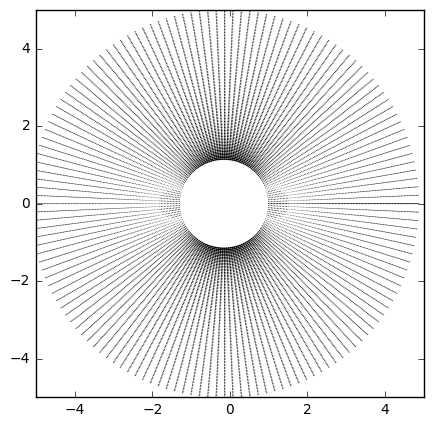

In [29]:
pyplot.figure(figsize=(5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.quiver(X,Y,u,v,)

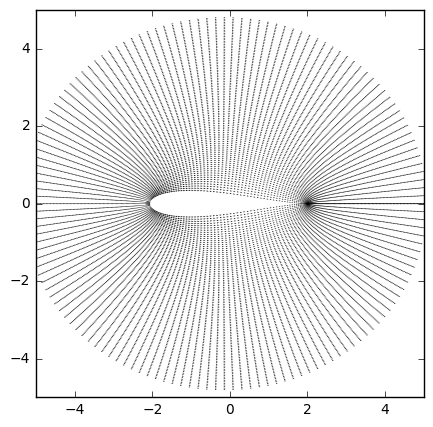

In [30]:
pyplot.figure(figsize=(5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.quiver(Z_trans.real,Z_trans.imag,u_xi,v_xi)

In [31]:
kappa

8.309512568745001

In [32]:
u_xi[61,0]

1.1063384662852436

In [33]:
v_xi[61,0]

0.52363334929849692

In [34]:
cp_z =  1-((u**2 + v**2)/u_freestream**2)
cp_xi = 1-((u_xi**2+v_xi**2)/u_freestream**2)   ###is here still use u_freestream?

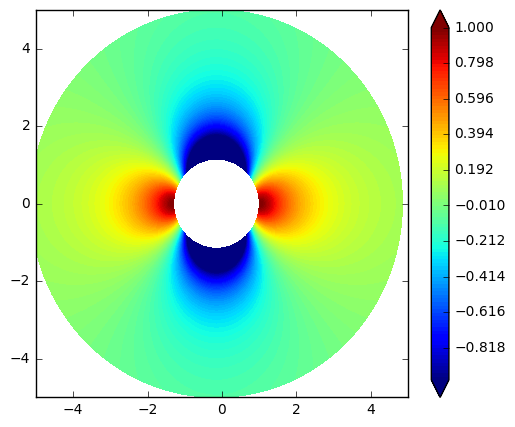

In [35]:
pyplot.figure(figsize=(6,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
contf = pyplot.contourf(X, Y, cp_z, levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)

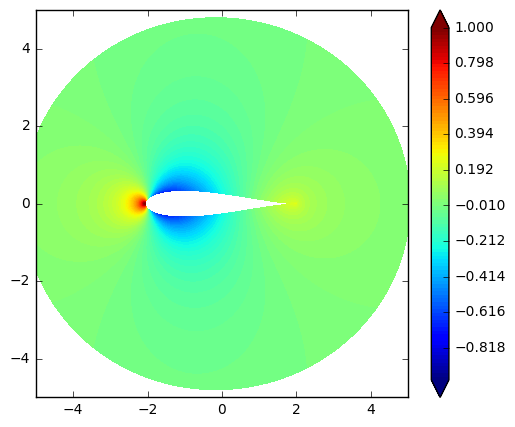

In [36]:
pyplot.figure(figsize=(6,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
contf = pyplot.contourf(Z_trans.real, Z_trans.imag, cp_xi, levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)

In [37]:
numpy.min(cp_xi[:,0])

-0.68775567409240423

---

In [38]:
#angle of attack
AoA = 20/180 * math.pi

#new plane centered at the doublet, with angle AoA to the original plane
xprime =  (X-x_center)*numpy.cos(AoA)+(Y-y_center)*numpy.sin(AoA)
yprime = -(X-x_center)*numpy.sin(AoA)+(Y-y_center)*numpy.cos(AoA)

In [39]:
#这个不成立：是doublet在原先的XY坐标系中，freestream在新的转了20度的坐标系中，图特别丑
#u_doublet2 = -kappa/(2*math.pi)*((X-x_center)**2-(Y-y_center)**2)/((X-x_center)**2+(Y-y_center)**2)**2
#v_doublet2 = -kappa/(2*math.pi)*(2*(X-x_center)*(Y-y_center))/((X-x_center)**2+(Y-y_center)**2)**2
#psi_doublet2 = -kappa/(2*math.pi)*(Y-y_center)/((X-x_center)**2+(Y-y_center**2))

In [40]:
#doublet in the zprime plane, centered at origin, 
u_doublet2 = -kappa/(2*math.pi)*(xprime**2 - yprime**2)/\
               (xprime**2+yprime**2)**2
v_doublet2 = -kappa/(2*math.pi)*(2*xprime*yprime)/  \
             (xprime**2+yprime**2)**2
psi_doublet2 = -kappa/(2*math.pi)*yprime/(xprime**2+yprime**2)

In [41]:
#the velocity and the streamfunction of the freestream in the zprime plane
u_freestream2 = 1
v_freestream2 = 0
psi_freestream2 = yprime

In [42]:
#total velocity and streamfunction
u2prime = u_doublet2 + u_freestream2
v2prime = v_doublet2 + v_freestream2
psi2 = psi_doublet2 + psi_freestream2

In [43]:
velocity2 = (u2prime - 1j*v2prime)*numpy.exp(-1j*AoA)
u2 =  velocity2.real
v2 = -velocity2.imag

#u2 = u2prime*numpy.cos(AoA) - v2prime*numpy.sin(AoA)
#v2 = u2prime*numpy.sin(AoA) + v2prime*numpy.cos(AoA)

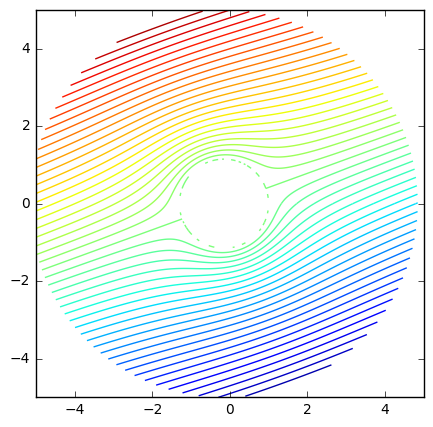

In [44]:
pyplot.figure(figsize=(5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.contour(X,Y,psi2,levels = numpy.linspace(-5,5,51))

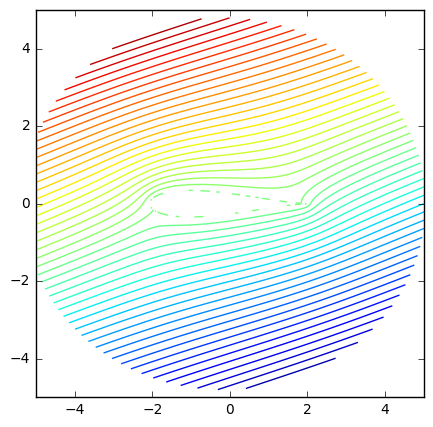

In [45]:
pyplot.figure(figsize=(5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.contour(Z_trans.real,Z_trans.imag,psi2,levels = numpy.linspace(-5,5,51),)

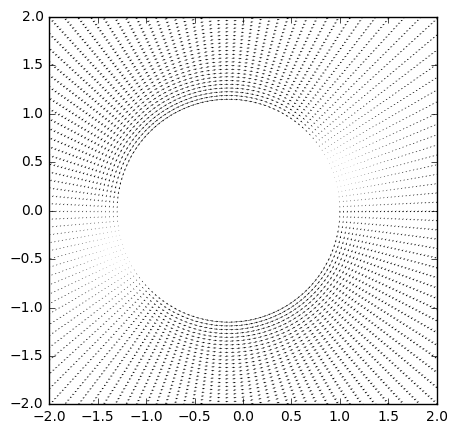

In [46]:
pyplot.figure(figsize=(5,5))
pyplot.xlim(-2,2)
pyplot.ylim(-2,2)
pyplot.quiver(X,Y,u2,v2,units='xy',pivot='tip',width=0.005,scale=40)

In [47]:
W_xi2 = (u2 - 1j*v2)/(1-(c/(Z))**2)
u_xi2 = W_xi2.real
v_xi2 = -W_xi2.imag

In [48]:
u_xi2[49,0]

1.4830654150147842

In [49]:
v_xi2[49,0]

0.092075495007287816

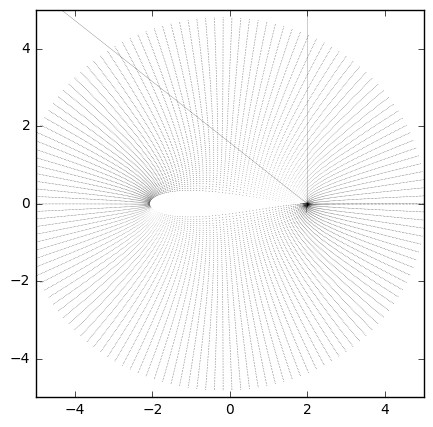

In [50]:
pyplot.figure(figsize=(5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.quiver(Z_trans.real,Z_trans.imag,u_xi2,v_xi2,units='xy',pivot='tip',width=0.005,scale=40)

In [51]:
UU = (u2**2+v2**2)**0.5
numpy.where(UU == numpy.min(UU))

(array([80], dtype=int64), array([0], dtype=int64))

In [52]:
cp_z2 =  1-((u2**2 + v2**2)/u_freestream**2)


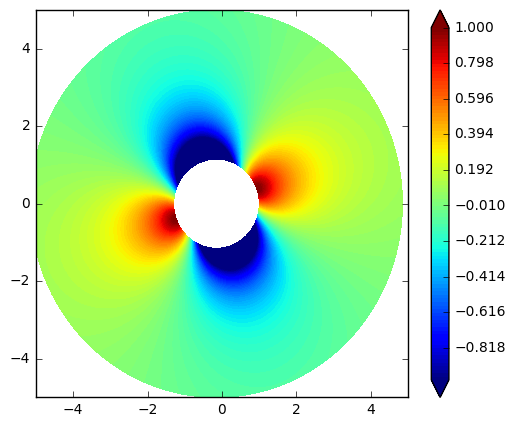

In [53]:
pyplot.figure(figsize=(6,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
contf = pyplot.contourf(X, Y, cp_z2, levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)

In [54]:
cp_xi2 = 1-((u_xi2**2+v_xi2**2)/u_freestream**2)

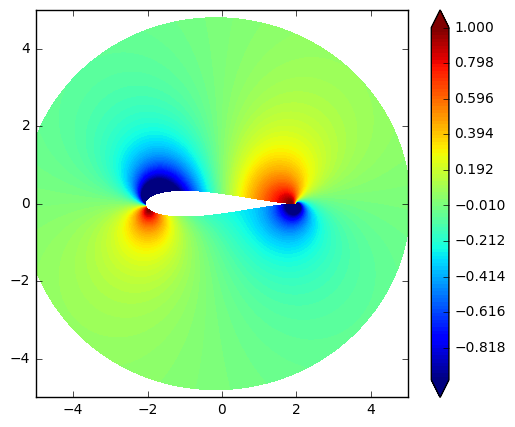

In [55]:
pyplot.figure(figsize=(6,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
contf = pyplot.contourf(Z_trans.real, Z_trans.imag, cp_xi2, levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)

---

In [56]:
u_xi2[49,0]

1.4830654150147842

In [57]:
v_xi2[49,0]

0.092075495007287816

In [58]:
cp_xi2[50,0]

-1.3109432351563477

In [59]:
cp_xi2[74,0]

-0.48520991643725919

---

---

In [60]:
gamma = -4*u_freestream*numpy.sin(-AoA)*math.pi*R_4            #here we use -AoA because we want to rotate the AoA clock wise for 20 degree
gamma

4.9426446603975851

In [61]:
#vortex velocity field, centered at x_center, y_center

u_vortex =  gamma/(2*math.pi)*yprime/(xprime**2+yprime**2)
v_vortex = -gamma/(2*math.pi)*xprime/(xprime**2+yprime**2)
psi_vortex=gamma/(4*math.pi)*numpy.log(xprime**2+yprime**2)

In [62]:
#the total velocity,u2prime(also v2prime, psi2) include freestream and the doublet

u3prime = u_vortex+u2prime
v3prime = v_vortex+v2prime
psi3prime = psi_vortex+psi2

In [63]:
#change the velocity in the xprime,yprime plane to x,y plane

velocity3 = (u3prime - 1j*v3prime)*numpy.exp(-1j*AoA)
u3 = velocity3.real
v3 = -velocity3.imag

In [64]:
u3[91,0]

0.17654617487025515

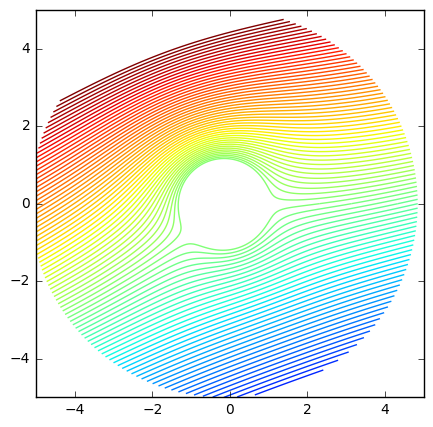

In [65]:
pyplot.figure(figsize=(5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.contour(X,Y,psi3prime,levels = numpy.linspace(-5,5,100))

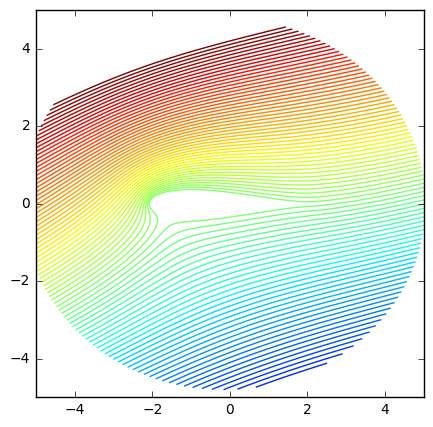

In [66]:
pyplot.figure(figsize=(5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.contour(Z_trans.real,Z_trans.imag,psi3prime,levels = numpy.linspace(-5,5,100),)

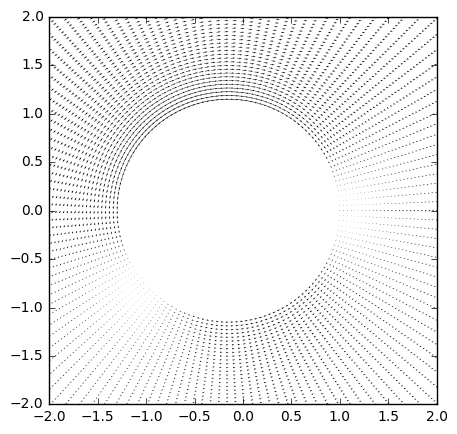

In [67]:
pyplot.figure(figsize=(5,5))
pyplot.xlim(-2,2)
pyplot.ylim(-2,2)
pyplot.quiver(X,Y,u3,v3,units='xy',pivot='tip',width=0.005,scale=40)

In [68]:
#change the velocity in x,y plane to x_xi,y_xi plane

W_xi3 = (u3 - 1j*v3)/(1-(c/Z)**2)
u_xi3 = W_xi3.real
v_xi3 = -W_xi3.imag

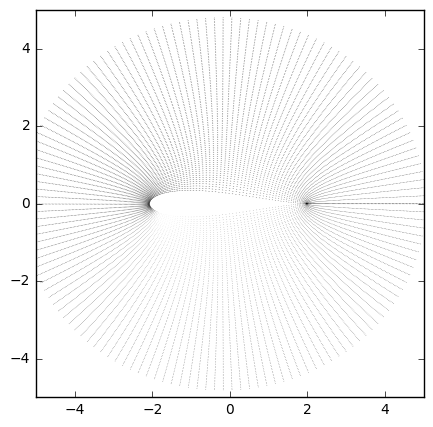

In [69]:
pyplot.figure(figsize=(5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.quiver(Z_trans.real,Z_trans.imag,u_xi3,v_xi3,units='xy',pivot='tip',width=0.005,scale=40)

In [70]:
#calculate the pressure coefficient in xy plane and x_xi,y_xi plane

cp_z3 =  1-((u3**2 + v3**2)/u_freestream**2)
cp_xi3 = 1-((u_xi3**2+v_xi3**2)/u_freestream**2)

In [71]:
cp_z3[91, 7]

0.86138576931769473

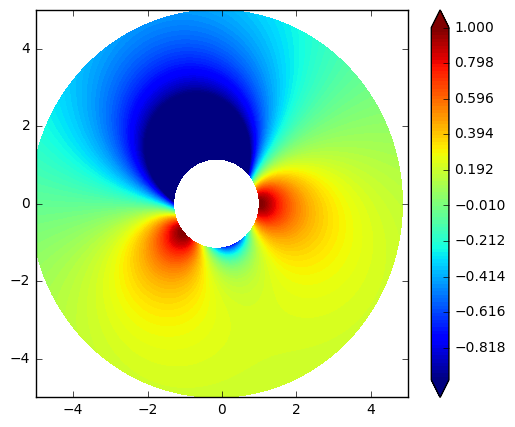

In [72]:
pyplot.figure(figsize=(6,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
contf = pyplot.contourf(X, Y, cp_z3, levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)

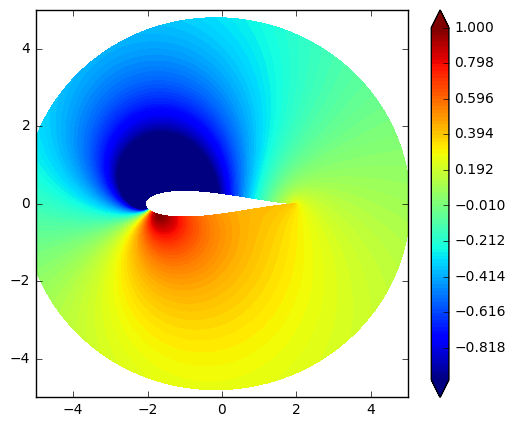

In [73]:
pyplot.figure(figsize=(6,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
contf = pyplot.contourf(Z_trans.real, Z_trans.imag, cp_xi3, levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)

In [74]:
UU2 = (u_xi3**2+v_xi3**2)**0.5
numpy.where(UU2 == numpy.min(UU2))

(array([88], dtype=int64), array([0], dtype=int64))

In [75]:
u_xi3[91,0]

0.20848311620747637

In [76]:
v_xi3[91,0]

-0.03198838919505255

In [77]:
cp_xi3[110,0]

0.49669467238347376